# Implementation exercise: k-NN

Train set: 100
Test set: 50
48
Accuracy: 96.0


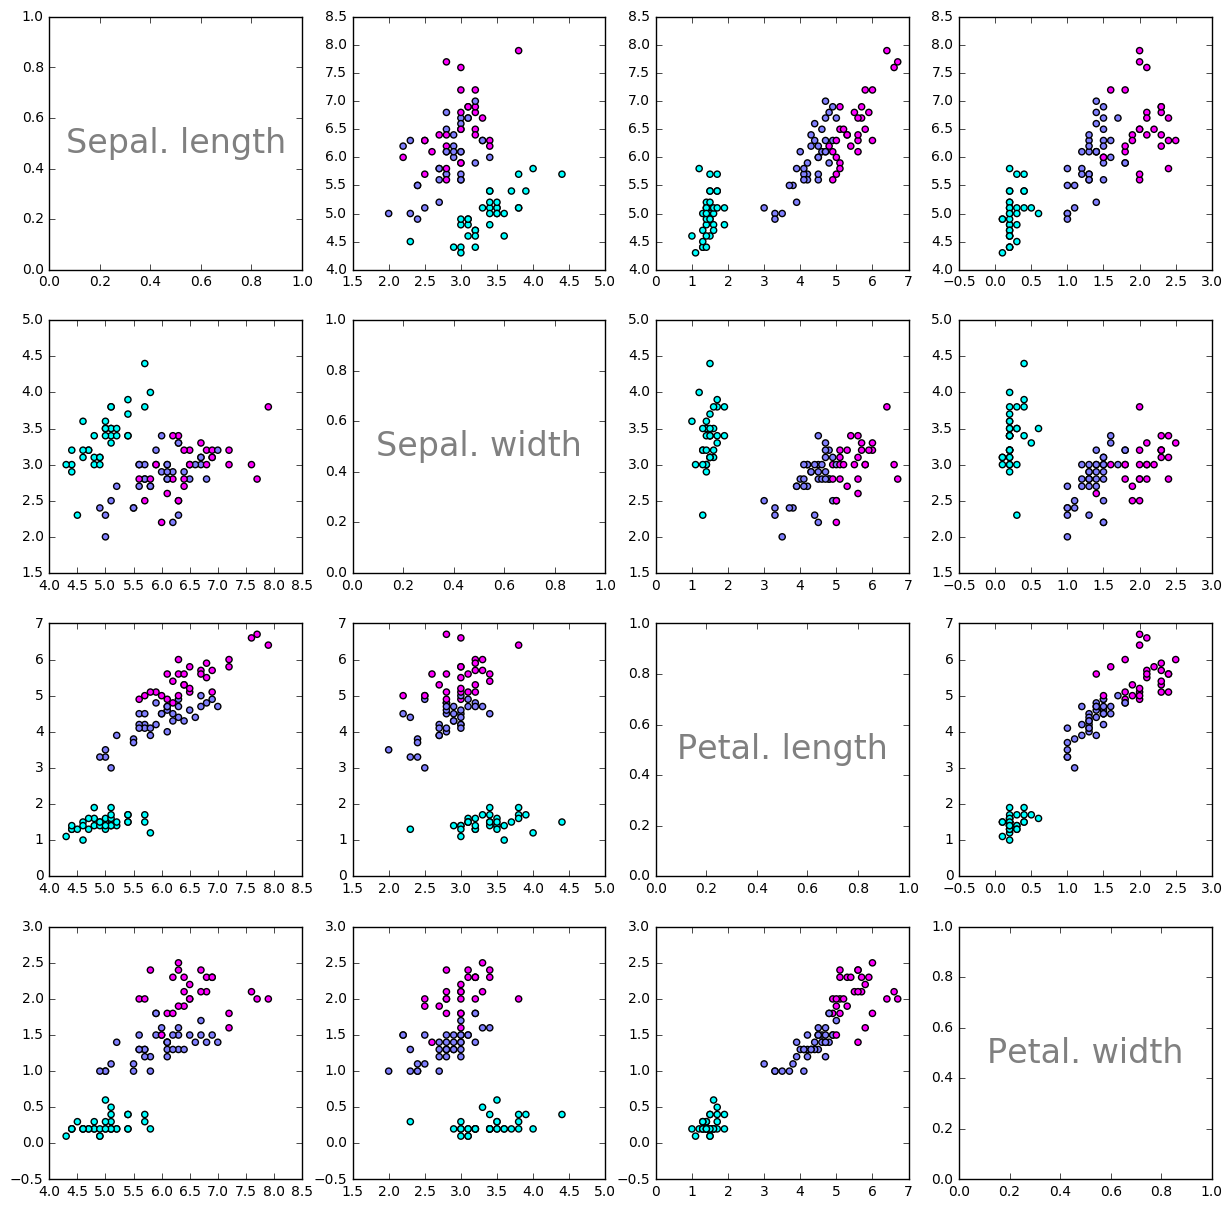

In [29]:
import random
import math
import numpy as np
import operator
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline  

def loadDataset(split, X=[] , XT=[], Z = [], ZT = []):
    dataset = datasets.load_iris()
    c = list(zip(dataset['data'], dataset['target']))
    random.seed(224)
    random.shuffle(c)
    x, t = zip(*c)
    sp = int(split*len(c))
    X = x[:sp]
    XT = x[sp:]
    Z = t[:sp]
    ZT = t[sp:]
    return X, XT, Z, ZT

# prepare data
split = 0.67
X, XT, Z, ZT = loadDataset(split)

Xa = np.asarray(X)
f, axes = plt.subplots(4, 4,figsize=(15, 15))
for i in range(4):
    for j in range(4):
        if j == 0 and i == 0:
            axes[i,j].text(0.5, 0.5, 'Sepal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 1 and i == 1:
            axes[i,j].text(0.5, 0.5, 'Sepal. width', ha='center', va='center', size=24, alpha=.5)
        elif j == 2 and i == 2:
            axes[i,j].text(0.5, 0.5, 'Petal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 3 and i == 3:
            axes[i,j].text(0.5, 0.5, 'Petal. width', ha='center', va='center', size=24, alpha=.5)
        else:
            axes[i,j].scatter(Xa[:,j],Xa[:,i], c = Z, cmap=plt.cm.cool)
            
def euclideanDistance(x1, x2):
    dis = 0
    for i in range(len(x1)):
        dis += pow((x1[i]-x2[i]),2)
    return math.sqrt(dis) 

def getNeighbors(X, Z, xt, k):
    distances = []
    for x1 in X:
        distance = euclideanDistance(x1,xt)
        distances.append(distance)
    sortedDistances = distances[:]
    sortedDistances.sort()
    neighbors = []
    for d in sortedDistances:
        if(len(neighbors)<k):
            for index in range(len(distances)):
                if(d == distances[index] and len(neighbors)<k):
                    neighbor = (X[index],Z[index],d)
                    neighbors.append(neighbor)
    return neighbors

def getResponse(neighbors, c=3):
    response = -1
    classVotes = [0] * c
    for neighbor in neighbors:
        classVotes[int(neighbor[1])]=classVotes[int(neighbor[1])]+1

    if (classVotes[0] >= classVotes[1] and classVotes[0] >= classVotes[2]):
        response = 0
    elif (classVotes[2] >= classVotes[1] and classVotes[2] >= classVotes[0]):
        response = 2
    elif (classVotes[1] >= classVotes[0] and classVotes[1] >= classVotes[2]):
        response = 1
    else :
        response = 0
    return response

def getAccuracy(YT, ZT):
    success = 0
    size = len(YT)
    for i in range(size):
        if(YT[i] == ZT[i]):
            success+=1
    accuracy = (success/float(size))*100
    print(success)
    return accuracy

def predict(X, Z, XT, k):
    Y=[]
    for xt in XT:
        neighbors = getNeighbors(X, Z, xt, k)
        Y.append(getResponse(neighbors))
    return Y

# prepare data
split = 0.67
X, XT, Z, ZT = loadDataset(split)
print ('Train set: ' + repr(len(X)))
print ('Test set: ' + repr(len(XT)))
# generate predictions
k = 3
YT = predict(X, Z, XT, k)
accuracy = getAccuracy(YT, ZT)
print('Accuracy: ' + repr(accuracy))